In [101]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [102]:
data = pd.read_csv("../data/database.csv")

In [103]:
data.head()

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
0,01/02/1965,13:44:18,19.246,145.616,Earthquake,131.6,NaN,NaN,6.0,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1,01/04/1965,11:29:49,1.863,127.352,Earthquake,80.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
2,01/05/1965,18:05:58,-20.579,-173.972,Earthquake,20.0,NaN,NaN,6.2,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic
3,01/08/1965,18:49:43,-59.076,-23.557,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic
4,01/09/1965,13:32:50,11.938,126.427,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic


In [104]:
data = data[['Date', 'Time', 'Latitude', 'Longitude', 'Depth', 'Magnitude']]
data.head()

,Date,Time,Latitude,Longitude,Depth,Magnitude
0,01/02/1965,13:44:18,19.246,145.616,131.6,6.0
1,01/04/1965,11:29:49,1.863,127.352,80.0,5.8
2,01/05/1965,18:05:58,-20.579,-173.972,20.0,6.2
3,01/08/1965,18:49:43,-59.076,-23.557,15.0,5.8
4,01/09/1965,13:32:50,11.938,126.427,15.0,5.8


In [105]:
data['Timestamp'] = pd.to_datetime(data['Date'] + ' ' + data['Time'], format="%m/%d/%Y %H:%M:%S", errors='coerce')


In [106]:
data.head()

,Date,Time,Latitude,Longitude,Depth,Magnitude,Timestamp
0,01/02/1965,13:44:18,19.246,145.616,131.6,6.0,1965-01-02 13:44:18
1,01/04/1965,11:29:49,1.863,127.352,80.0,5.8,1965-01-04 11:29:49
2,01/05/1965,18:05:58,-20.579,-173.972,20.0,6.2,1965-01-05 18:05:58
3,01/08/1965,18:49:43,-59.076,-23.557,15.0,5.8,1965-01-08 18:49:43
4,01/09/1965,13:32:50,11.938,126.427,15.0,5.8,1965-01-09 13:32:50


In [107]:
data = data[data['Timestamp'] >= pd.Timestamp('1970-01-01')]

data.reset_index(drop=True, inplace=True)
data = data.drop(['Date', 'Time'], axis=1)
data.head()


,Latitude,Longitude,Depth,Magnitude,Timestamp
0,-29.400,-177.169,35.0,5.6,1970-01-01 17:11:00
1,24.185,102.543,11.3,7.1,1970-01-04 17:00:41
2,23.984,102.732,15.0,5.9,1970-01-05 11:49:10
3,-9.583,151.493,15.0,6.3,1970-01-06 05:35:54
4,15.785,-59.808,36.7,6.0,1970-01-07 07:56:14


In [108]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21953 entries, 0 to 21952
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Latitude   21953 non-null  float64       
 1   Longitude  21953 non-null  float64       
 2   Depth      21953 non-null  float64       
 3   Magnitude  21953 non-null  float64       
 4   Timestamp  21953 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(4)
memory usage: 857.7 KB


In [109]:
from mpl_toolkits.basemap import Basemap

In [110]:
m = Basemap(projection='mill',llcrnrlat=-80,urcrnrlat=80, llcrnrlon=-180,urcrnrlon=180,lat_ts=20,resolution='c')

longitudes = data["Longitude"].tolist()
latitudes = data["Latitude"].tolist()
x,y = m(longitudes,latitudes)

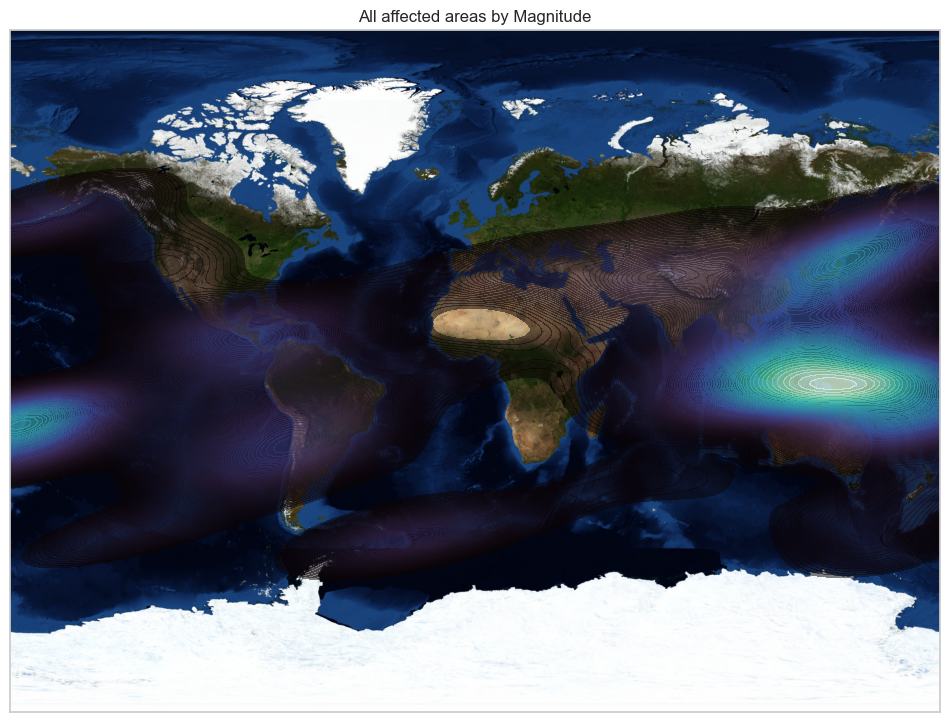

In [145]:
from matplotlib.colors import ListedColormap, LinearSegmentedColormap


fig = plt.figure(figsize=(12, 10))
plt.title("All affected areas by Magnitude")

m = Basemap(projection='mill',
            llcrnrlat=-90, urcrnrlat=90,
            llcrnrlon=-180, urcrnrlon=180, 
            resolution='c')
m.bluemarble()

x, y = m(data['Longitude'].values, data['Latitude'].values)

base_cmap = plt.colormaps["mako"]

colors = base_cmap(np.linspace(0, 1, 256))
colors[:, -1] = np.linspace(0.5, 0.8, 256)
transparent_cmap = ListedColormap(colors)

sns.kdeplot(x=x, y=y, cmap=transparent_cmap, fill=True, levels=100, zorder=2)

plt.show()


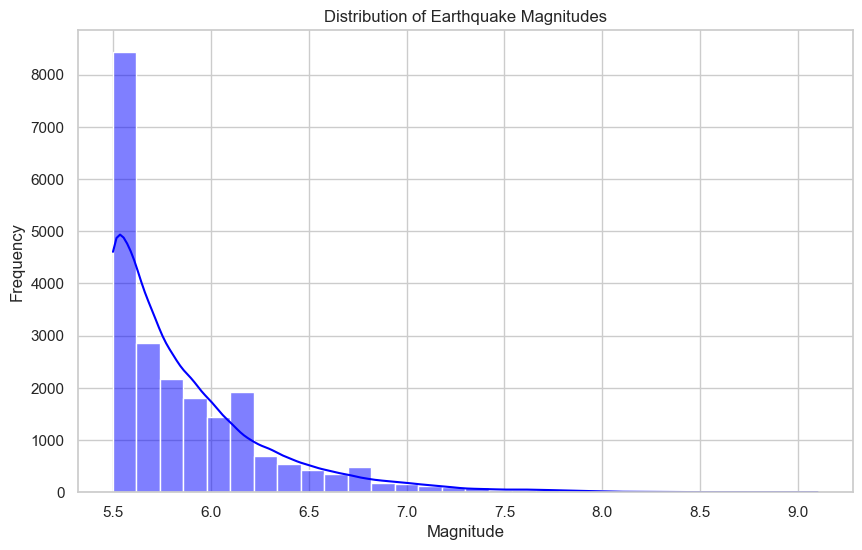

In [112]:
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.histplot(data['Magnitude'], bins=30, kde=True, color='blue')
plt.title('Distribution of Earthquake Magnitudes')
plt.xlabel('Magnitude')
plt.ylabel('Frequency')
plt.show()

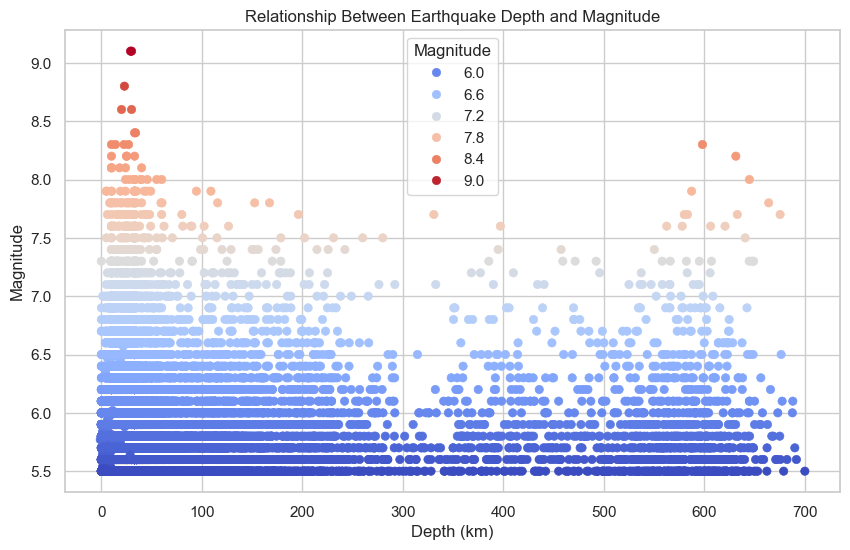

In [113]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Depth', y='Magnitude', data=data, hue='Magnitude', palette='coolwarm', edgecolor=None)
plt.title('Relationship Between Earthquake Depth and Magnitude')
plt.xlabel('Depth (km)')
plt.ylabel('Magnitude')
plt.show()

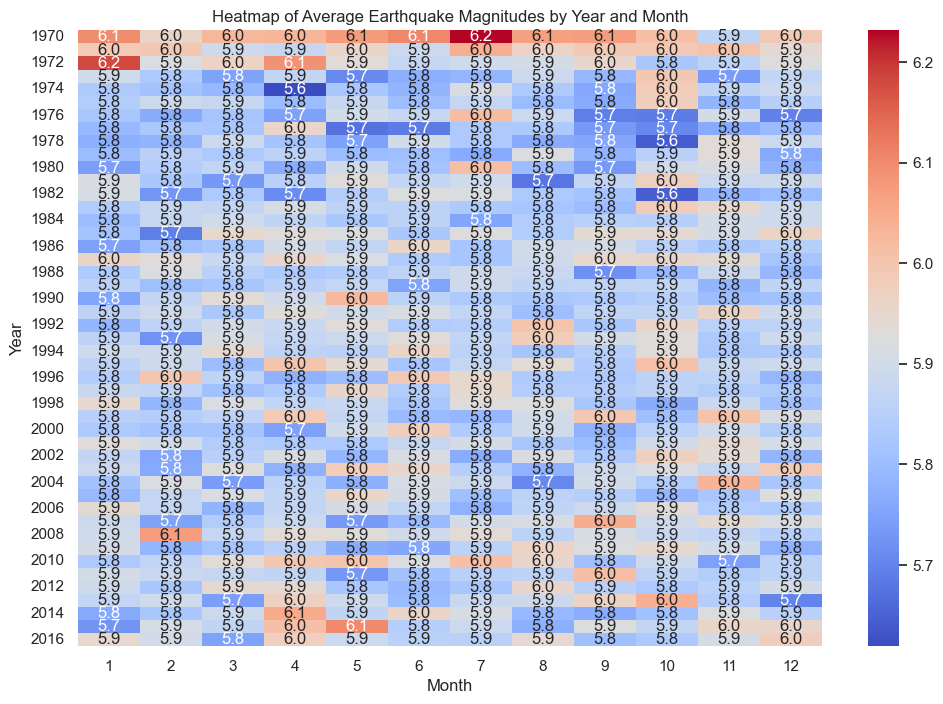

In [114]:
data['Year'] = data['Timestamp'].dt.year
data['Month'] = data['Timestamp'].dt.month

heatmap_data = data.pivot_table(index='Year', columns='Month', values='Magnitude', aggfunc='mean')

plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap="coolwarm", annot=True, fmt=".1f")
plt.title('Heatmap of Average Earthquake Magnitudes by Year and Month')
plt.show()

In [115]:
monthly_summary = data.groupby('Month').agg(
    Average_Magnitude=('Magnitude', 'mean'),
    Count=('Magnitude', 'size')
).reset_index()


In [116]:
monthly_summary.head()

,Month,Average_Magnitude,Count
0,1,5.863582,1781
1,2,5.862145,1688
2,3,5.863944,1983
3,4,5.893238,1853
4,5,5.881151,1842


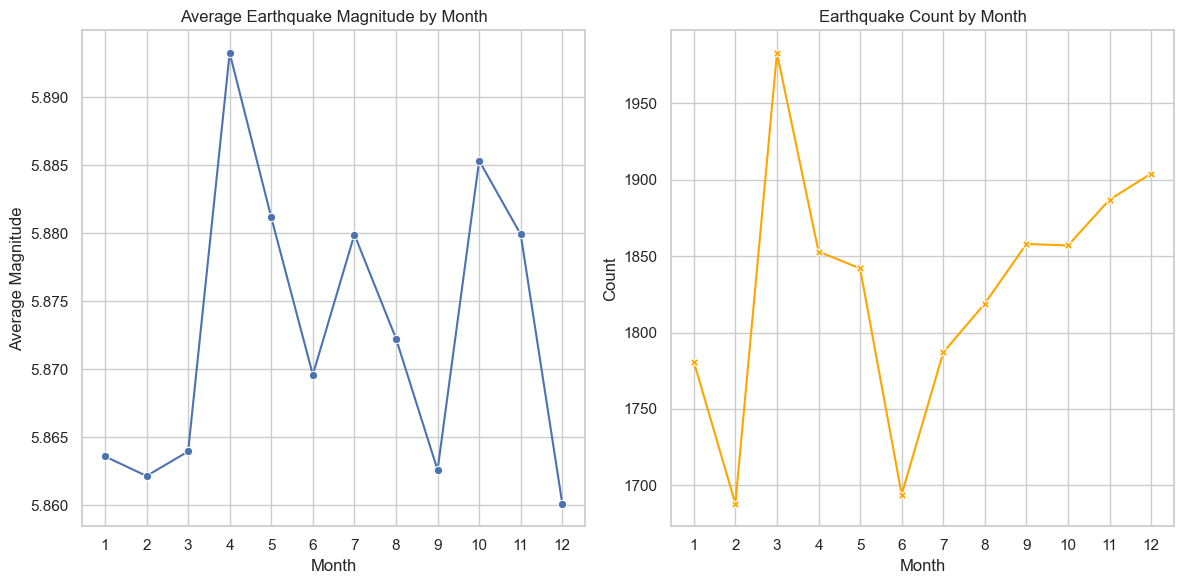

In [117]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.lineplot(x='Month', y='Average_Magnitude', data=monthly_summary, marker='o', color='b')
plt.title('Average Earthquake Magnitude by Month')
plt.xlabel('Month')
plt.ylabel('Average Magnitude')
plt.xticks(range(1, 13))

plt.subplot(1, 2, 2)
sns.lineplot(x='Month', y='Count', data=monthly_summary, marker='X', color='orange')
plt.title('Earthquake Count by Month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.xticks(range(1, 13))

plt.tight_layout()
plt.show()
